In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from mlxtend.preprocessing import minmax_scaling

from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objects as go
#import plotly.subplots as sp
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

from IPython.display import HTML, display, Markdown, clear_output

from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from statistics import mean
from sklearn import metrics
import matplotlib.pyplot as plt
 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.inspection import PartialDependenceDisplay

%matplotlib inline

print("All libraries loaded.......")

All libraries loaded.......


In [2]:
df = pd.read_csv('train.csv')

#creating a copy of the dataframe
dfc = df.copy()

df["Outlet_Age"] = 2013 - df["Outlet_Establishment_Year"]
dfc["Outlet_Age"] = 2013 - dfc["Outlet_Establishment_Year"]
df.drop("Outlet_Establishment_Year", axis=1, inplace=True)
dfc.drop("Outlet_Establishment_Year", axis=1, inplace=True)

df.head(10)



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,4
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,26
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,28
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986,11
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350,6


In [3]:
#dfc.isna().sum()

In [4]:
#df.dtypes

In [5]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

dfc['Item_Fat_Content'] = dfc['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

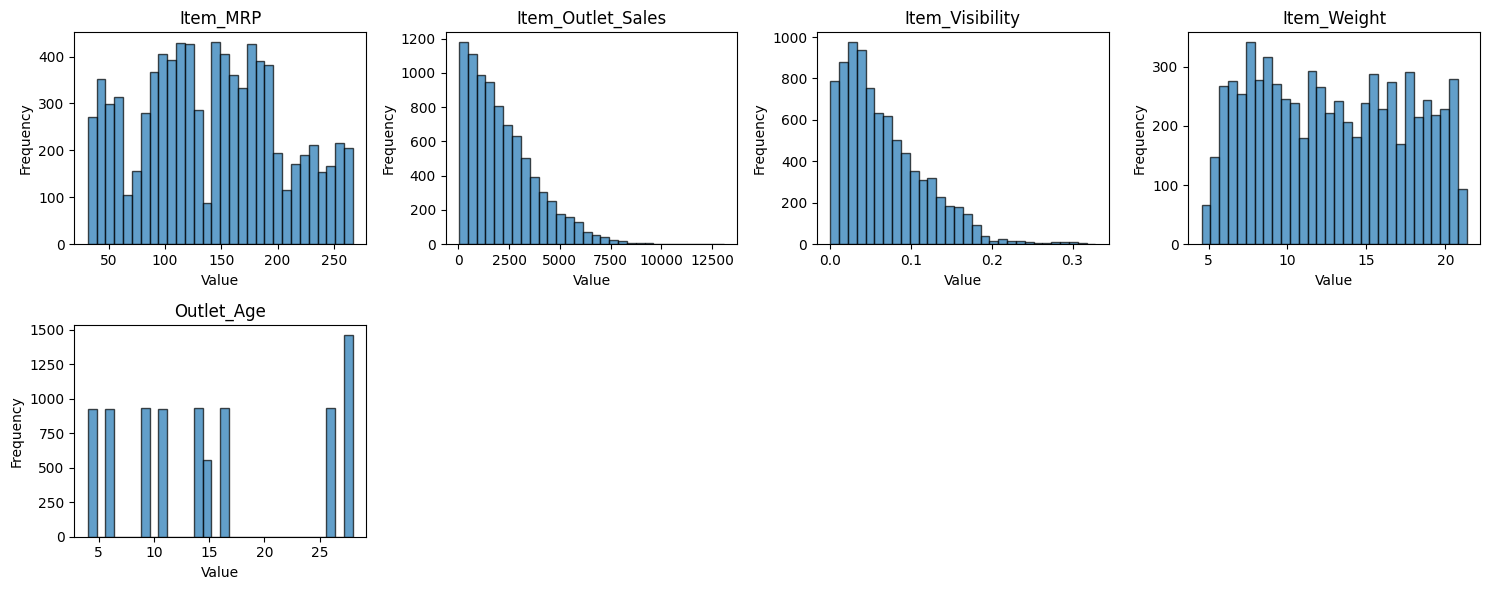

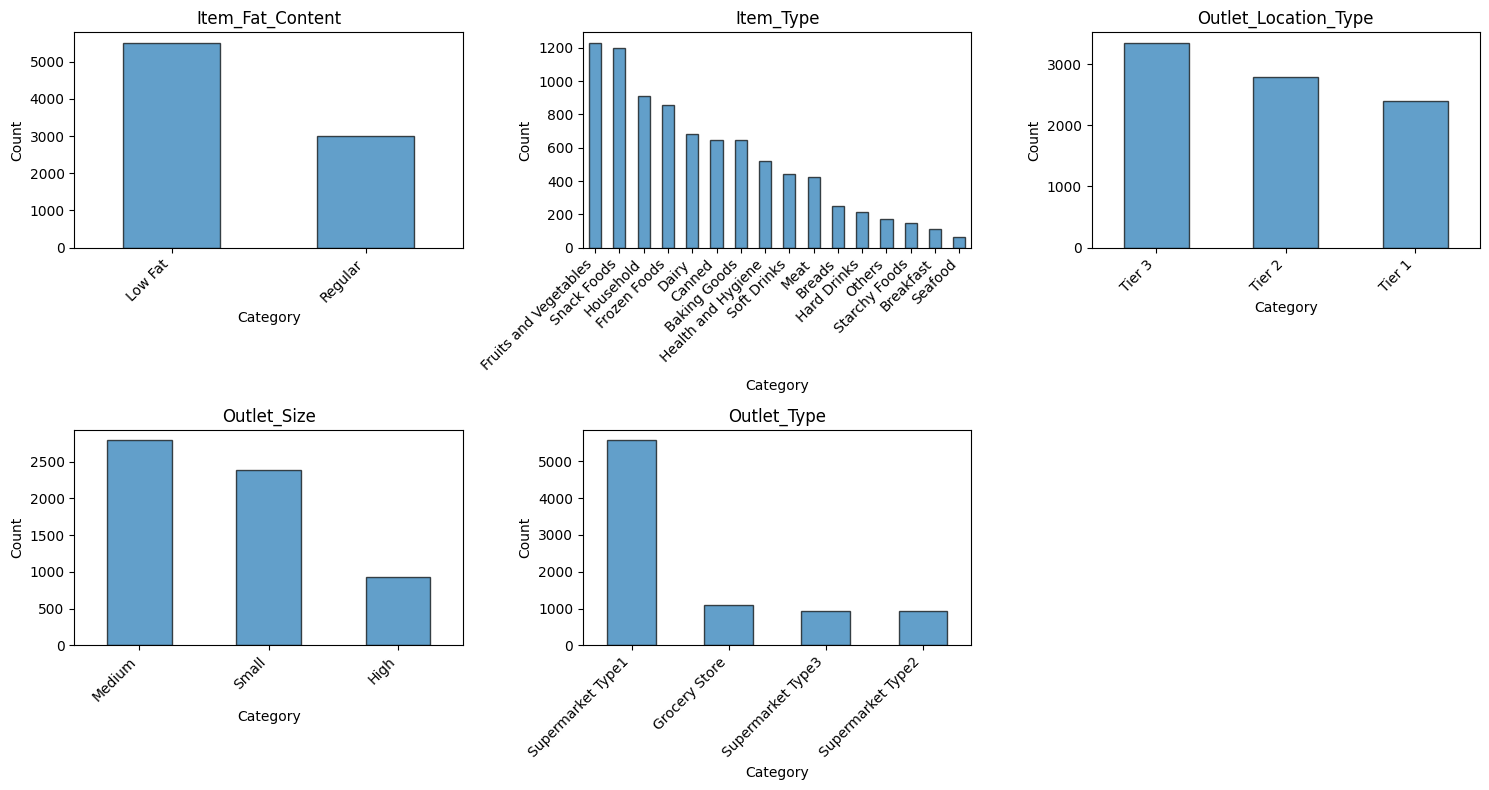

In [6]:
import matplotlib.pyplot as plt

# Columns to exclude
exclude_cols = ['Item_Identifier', 'Outlet_Identifier']

# Filter numeric and categorical columns, excluding specified columns
numeric_cols = df.select_dtypes(include=['number']).columns.difference(exclude_cols).tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.difference(exclude_cols).tolist()

# --- Plot numeric features ---
num_features = len(numeric_cols)
cols = 4
rows = (num_features // cols) + (num_features % cols > 0)

plt.figure(figsize=(15, rows * 3))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# --- Plot categorical features ---
cat_features = len(categorical_cols)
cols = 3
rows = (cat_features // cols) + (cat_features % cols > 0)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)
    df[col].value_counts().plot(kind='bar', edgecolor="black", alpha=0.7)
    plt.title(col)
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [7]:
# df['temperature category'] = pd.qcut(df['Temperature'], q=3, labels=['low', 'medium', 'high'])

# df['humidity category'] = pd.qcut(df['Humidity'], q=3, labels=['low', 'medium', 'high'])

# df['CO2 category'] = pd.qcut(df['CO2'], q=3, labels=['low', 'medium', 'high'])

# mean_value = df['Light Intensity'].mean()
# std_dev = df['Light Intensity'].std()
# def categorize(value):
#     if value <= mean_value - std_dev:
#         return 'low'  
#     elif value >= mean_value + std_dev:
#         return 'high'  
#     else:
#         return 'medium' 

# df['Light Intensity category'] = df['Light Intensity'].apply(categorize)

# df.head(10)

In [8]:
#dfc
dfc = dfc.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [9]:
## Target variable selection and split % 
target_var='Item_Outlet_Sales'
split_percentage=5

In [10]:
## X and y seperation
split_perc=split_percentage/100
X=dfc.loc[:,dfc.columns]
y=dfc[target_var]
X=X.drop(target_var,axis=1)

In [11]:
## Splitting the data for modelling (without oversampling)
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=split_perc,random_state=0)

print("Training-Validation Split Percentage:{split}".format(split=int((1-split_perc)*100)))
print("Total Observation:{obs}".format(obs=X.shape[0]))
print("Training Observation:{train_obs}".format(train_obs=x_train.shape[0]))
print("Validation Observation:{valid_obs}".format(valid_obs=x_valid.shape[0]))

Training-Validation Split Percentage:95
Total Observation:8523
Training Observation:8096
Validation Observation:427


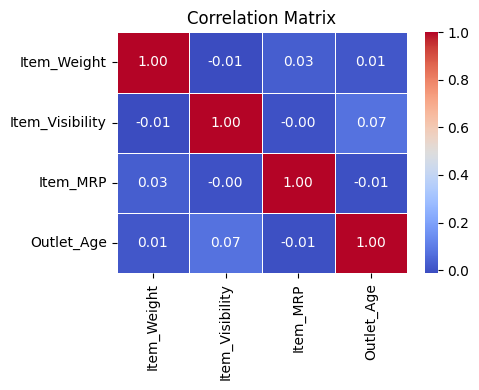

In [12]:
# Compute correlation only on numeric columns
corr_matrix = X.select_dtypes(include=['number']).corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title and layout adjustments
plt.title('Correlation Matrix')
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
x_train["Outlet_Size"] = x_train["Outlet_Size"].fillna("Unk")

# # Create mapping from Outlet_Type to mode of Outlet_Size
# mode_map = x_train.groupby("Outlet_Type")["Outlet_Size"].agg(lambda x: x.mode().iloc[0])

# # Impute missing Outlet_Size using the Outlet_Type-specific mode
# combined_df["Outlet_Size"] = x_train.apply(
#     lambda row: mode_map[row["Outlet_Type"]] if pd.isna(row["Outlet_Size"]) else row["Outlet_Size"],
#     axis=1
# )

mode_weight = x_train["Item_Weight"].mode()[0]
x_train["Item_Weight"] = x_train["Item_Weight"].fillna(mode_weight)

#x_train

In [14]:
# Define manual mappings starting from 1
fat_content_map = {
    'Low Fat': 1,
    'Regular': 2,
    'low fat': 1,
    'LF': 1,
    'reg': 2
}

location_type_map = {
    'Tier 1': 1,
    'Tier 2': 2,
    'Tier 3': 3
}

outlet_size_map = {
    'Small': 1,
    'Medium': 2,
    'High': 3,
    'Unk': 4  # if used to fill missing values
}

outlet_type_map = {
    'Grocery Store': 1,
    'Supermarket Type1': 2,
    'Supermarket Type2': 3,
    'Supermarket Type3': 4
}

# Apply mappings to both datasets
for df in [x_train]:
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)
    df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map(location_type_map)
    df['Outlet_Size'] = df['Outlet_Size'].map(outlet_size_map)
    df['Outlet_Type'] = df['Outlet_Type'].map(outlet_type_map)

#df


In [15]:
x_train=df.copy()
#x_train

In [16]:
x_train = pd.get_dummies(x_train, columns=["Item_Type"], prefix="ItemType", dtype=int)
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,ItemType_Baking Goods,ItemType_Breads,...,ItemType_Fruits and Vegetables,ItemType_Hard Drinks,ItemType_Health and Hygiene,ItemType_Household,ItemType_Meat,ItemType_Others,ItemType_Seafood,ItemType_Snack Foods,ItemType_Soft Drinks,ItemType_Starchy Foods
7276,7.210,2,0.144925,100.8332,4,2,2,11,0,0,...,0,0,0,0,0,0,0,1,0,0
1422,10.600,1,0.035164,84.4224,3,3,2,26,0,0,...,0,0,1,0,0,0,0,0,0,0
4561,19.700,1,0.041974,108.6912,4,2,2,6,0,0,...,0,0,0,0,0,0,0,0,0,0
6183,9.600,1,0.000000,166.5158,2,1,2,14,0,0,...,0,0,0,0,0,0,0,0,1,0
1644,6.035,1,0.236434,155.5998,4,3,1,15,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,15.200,1,0.020280,49.1034,4,3,1,15,0,0,...,0,0,1,0,0,0,0,0,0,0
7891,12.150,2,0.025616,188.1872,2,3,4,28,0,0,...,0,0,0,0,0,0,0,1,0,0
4859,13.500,2,0.000000,78.3960,1,2,2,9,0,0,...,0,0,0,0,0,0,0,1,0,0
3264,18.700,1,0.104890,121.4072,4,2,2,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def multi_collinear(x_train_processed):
    truncate_value=10
    exog_df=x_train_processed.loc[:,x_train_processed.columns!=target_var]
    exog_df=x_train_processed.copy()
    
    exog_df=add_constant(exog_df)
    vifs=pd.Series([1/(1.-OLS(exog_df[col].values,
                              exog_df.loc[:,exog_df.columns!=col].values).fit().rsquared) for col in exog_df],
                   index=exog_df.columns,
                   name='VIF')
    
    vifs=pd.DataFrame(vifs)
    vifs.drop('const',axis=0,inplace=True)
    vifs=vifs['VIF'].where(vifs['VIF']<=truncate_value,truncate_value)
    vifs=pd.DataFrame(vifs)
    vifs_df=vifs.sort_values(by=['VIF'],ascending=True)
    
    vifs_df['colors']=np.where(vifs_df.VIF<=5,'yellowgreen',
                                 np.where((vifs_df.VIF>5) & (vifs_df.VIF<=10),'steelblue','tomato'))
    
    Layout=go.Layout(title="VIF plot", xaxis=dict(title='VIF'),yaxis=dict(title='Features'))
    fig=go.Figure(go.Bar(x=vifs_df.VIF,y=vifs_df.index.tolist(),
                         orientation='h',marker_color=vifs_df['colors']),layout=Layout)
    fig.add_shape(type="line",x0=5,y0=0,x1=5,y1=len(vifs_df.index.tolist()),
                  line=dict(color="midnightblue",width=2,dash="dot"))
    fig.add_shape(type="line",x0=10,y0=0,x1=10,y1=len(vifs_df.index.tolist()),
                  line=dict(color="midnightblue",width=2,dash="dot"))
    
    fig.update_layout(width=600,height=300)
    fig.show(config={'displaylogo':False})
    return vifs

vifs=multi_collinear(x_train)


def multi_col_vars(vifs):
    multicorr_vars=vifs['VIF'].loc[lambda x:x>=10].index.tolist()
    col_to_drop=multicorr_vars
    
    if col_to_drop==[]:
        #clear_output()
        print("No columns were dropped")
    else:
        #clear_output()
        x_train.drop(col_to_drop,axis=1,inplace=True)
        display(Markdown('Successfully dropped:{}'.format(",".join(col_to_drop))))
        
        display(x_train.dtypes)
    return x_train


x_train=multi_col_vars(vifs)

Successfully dropped:ItemType_Baking Goods,ItemType_Breads,ItemType_Breakfast,ItemType_Canned,ItemType_Dairy,ItemType_Frozen Foods,ItemType_Fruits and Vegetables,ItemType_Hard Drinks,ItemType_Health and Hygiene,ItemType_Household,ItemType_Meat,ItemType_Others,ItemType_Seafood,ItemType_Snack Foods,ItemType_Soft Drinks,ItemType_Starchy Foods

Item_Weight             float64
Item_Fat_Content          int64
Item_Visibility         float64
Item_MRP                float64
Outlet_Size               int64
Outlet_Location_Type      int64
Outlet_Type               int64
Outlet_Age                int64
dtype: object

In [18]:
## Chceking variability between the column values
def variability(x_train):
    selected_features=[]
    selected_features_dict={}
    col_drop=[]
    zero_variance=(x_train.describe().loc['std']==0)
    zero_variance=zero_variance[zero_variance].index.tolist()
    if len(zero_variance)==0:
        print('No columns with 0 std dev.')
    else:
        display(pd.DataFrame(zero_varinace,columns=['Features']))
        col_drop.extend(zero_variance)
    return selected_features,selected_features_dict,col_drop

variability(x_train)

No columns with 0 std dev.


([], {}, [])

In [19]:
x_valid["Outlet_Size"] = x_valid["Outlet_Size"].fillna("Unk")

# # Create mapping from Outlet_Type to mode of Outlet_Size
# mode_map = x_train.groupby("Outlet_Type")["Outlet_Size"].agg(lambda x: x.mode().iloc[0])

# # Impute missing Outlet_Size using the Outlet_Type-specific mode
# combined_df["Outlet_Size"] = x_train.apply(
#     lambda row: mode_map[row["Outlet_Type"]] if pd.isna(row["Outlet_Size"]) else row["Outlet_Size"],
#     axis=1
# )

mode_weight = x_valid["Item_Weight"].mode()[0]
x_valid["Item_Weight"] = x_valid["Item_Weight"].fillna(mode_weight)


# Define manual mappings starting from 1
fat_content_map = {
    'Low Fat': 1,
    'Regular': 2,
    'low fat': 1,
    'LF': 1,
    'reg': 2
}

location_type_map = {
    'Tier 1': 1,
    'Tier 2': 2,
    'Tier 3': 3
}

outlet_size_map = {
    'Small': 1,
    'Medium': 2,
    'High': 3,
    'Unk': 4  # if used to fill missing values
}

outlet_type_map = {
    'Grocery Store': 1,
    'Supermarket Type1': 2,
    'Supermarket Type2': 3,
    'Supermarket Type3': 4
}

# Apply mappings to both datasets
for df in [x_valid]:
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)
    df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map(location_type_map)
    df['Outlet_Size'] = df['Outlet_Size'].map(outlet_size_map)
    df['Outlet_Type'] = df['Outlet_Type'].map(outlet_type_map)

#df

x_valid = df.copy()

x_valid = pd.get_dummies(x_valid, columns=["Item_Type"], prefix="ItemType", dtype=int)

In [20]:
x_valid

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,ItemType_Baking Goods,ItemType_Breads,...,ItemType_Fruits and Vegetables,ItemType_Hard Drinks,ItemType_Health and Hygiene,ItemType_Household,ItemType_Meat,ItemType_Others,ItemType_Seafood,ItemType_Snack Foods,ItemType_Soft Drinks,ItemType_Starchy Foods
4931,14.500,1,0.089960,159.5604,4,2,2,11,0,0,...,0,0,1,0,0,0,0,0,0,0
4148,17.600,1,0.009535,64.5510,2,3,4,28,0,0,...,0,0,0,0,0,0,0,1,0,0
7423,11.500,1,0.017742,129.6626,4,2,2,6,0,0,...,0,0,1,0,0,0,0,0,0,0
4836,10.195,1,0.000000,143.1154,4,2,2,6,0,0,...,0,0,0,0,0,0,0,0,0,0
944,21.000,1,0.049264,195.0478,3,3,2,26,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,8.010,1,0.070534,34.2532,2,3,3,4,0,0,...,0,1,0,0,0,0,0,0,0,0
7868,6.885,2,0.140009,108.7228,1,1,2,16,0,0,...,0,0,0,0,0,0,0,0,0,0
6837,6.570,1,0.066339,261.4278,2,3,3,4,0,0,...,0,1,0,0,0,0,0,0,0,0
3975,8.395,1,0.000000,98.7042,3,3,2,26,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
## Filtering the list of columns in the x_test dataframe as per the x_train VIF removed columns
x_test=[]
for i in x_train:
    if i in x_valid:
        x_test.append(i)
        
x_test=x_valid[x_test]

In [22]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
4931,14.500,1,0.089960,159.5604,4,2,2,11
4148,17.600,1,0.009535,64.5510,2,3,4,28
7423,11.500,1,0.017742,129.6626,4,2,2,6
4836,10.195,1,0.000000,143.1154,4,2,2,6
944,21.000,1,0.049264,195.0478,3,3,2,26
...,...,...,...,...,...,...,...,...
7733,8.010,1,0.070534,34.2532,2,3,3,4
7868,6.885,2,0.140009,108.7228,1,1,2,16
6837,6.570,1,0.066339,261.4278,2,3,3,4
3975,8.395,1,0.000000,98.7042,3,3,2,26


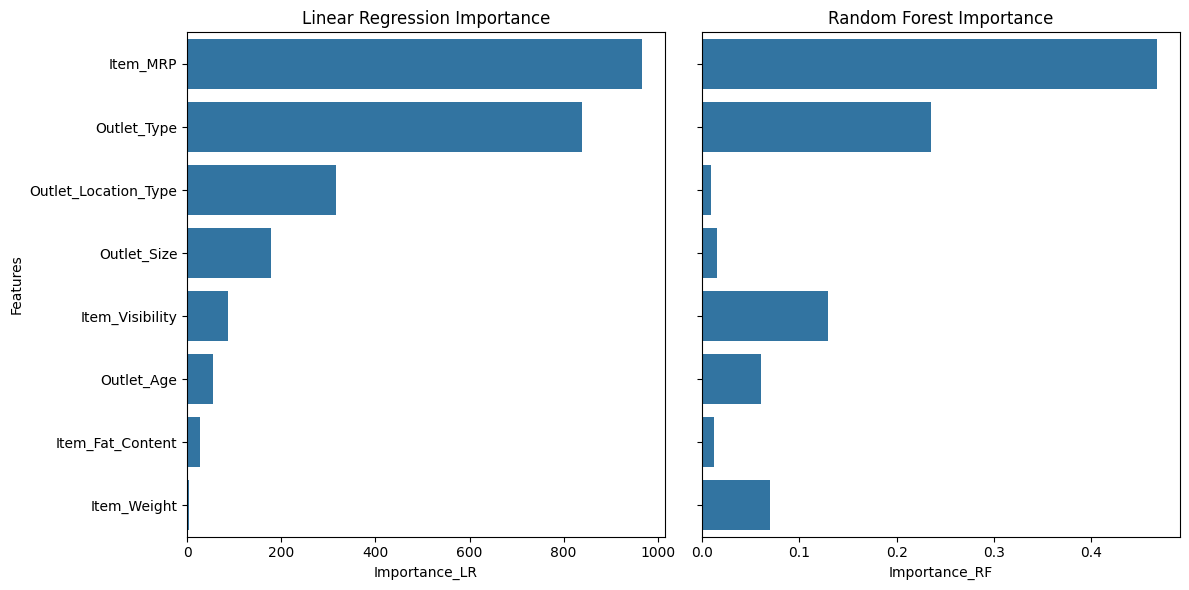

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fit Random Forest Regressor
forest = RandomForestRegressor(random_state=42)
forest.fit(x_train, y_train)

importances_rf = forest.feature_importances_.tolist()
feat_labels = x_train.columns.tolist()

df_imp_rf = pd.DataFrame({
    'Features': feat_labels,
    'Importance_RF': importances_rf
}).sort_values('Importance_RF', ascending=False)

# Fit Linear Regression (standardized)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

importance_lr = np.abs(lr.coef_).tolist()

df_imp_lr = pd.DataFrame({
    'Features': feat_labels,
    'Importance_LR': importance_lr
}).sort_values('Importance_LR', ascending=False)

# Merge both importance DataFrames
feature_imp = pd.merge(df_imp_lr, df_imp_rf, on='Features')

# Plotting the importance side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.barplot(ax=axes[0], x='Importance_LR', y='Features', data=feature_imp, orient='h')
axes[0].set_title("Linear Regression Importance")

sns.barplot(ax=axes[1], x='Importance_RF', y='Features', data=feature_imp, orient='h')
axes[1].set_title("Random Forest Importance")

plt.tight_layout()
plt.show()


In [24]:
x_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age'],
      dtype='object')

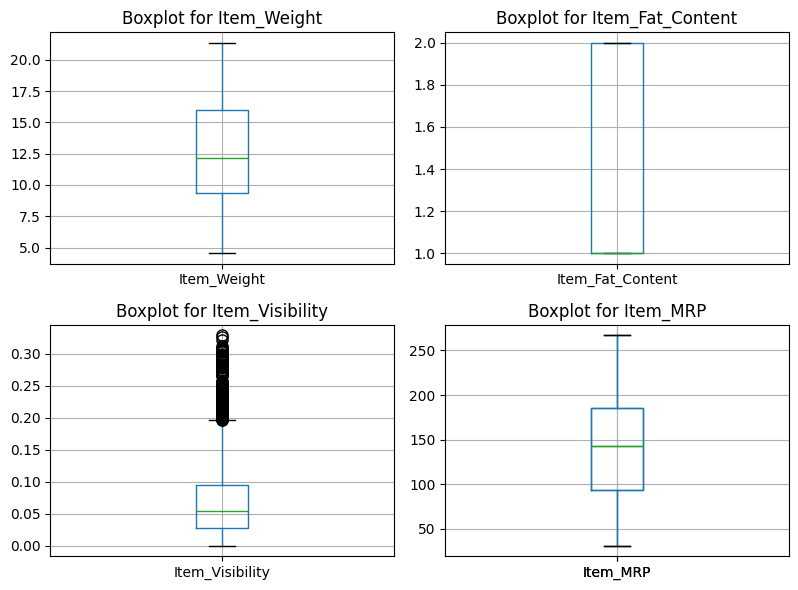

In [25]:
# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot boxplots for each column in the dataframe with enhanced outlier visibility
x_train.boxplot(column='Item_Weight', ax=axes[0, 0], flierprops=dict(marker='o', color='r', markersize=8))
axes[0, 0].set_title('Boxplot for Item_Weight')

x_train.boxplot(column='Item_Fat_Content', ax=axes[0, 1], flierprops=dict(marker='o', color='r', markersize=8))
axes[0, 1].set_title('Boxplot for Item_Fat_Content')

x_train.boxplot(column='Item_Visibility', ax=axes[1, 0], flierprops=dict(marker='o', color='r', markersize=8))
axes[1, 0].set_title('Boxplot for Item_Visibility')

x_train.boxplot(column='Item_MRP', ax=axes[1, 1], flierprops=dict(marker='o', color='r', markersize=8))
axes[1, 1].set_title('Boxplot for Item_MRP')

x_train.boxplot(column='Item_MRP', ax=axes[1, 1], flierprops=dict(marker='o', color='r', markersize=8))
axes[1, 1].set_title('Boxplot for Item_MRP')

# Adjust the layout for better display
plt.tight_layout()

# Show the plot

Text(0.5, 1.0, 'Boxplot for Item_Visibility')

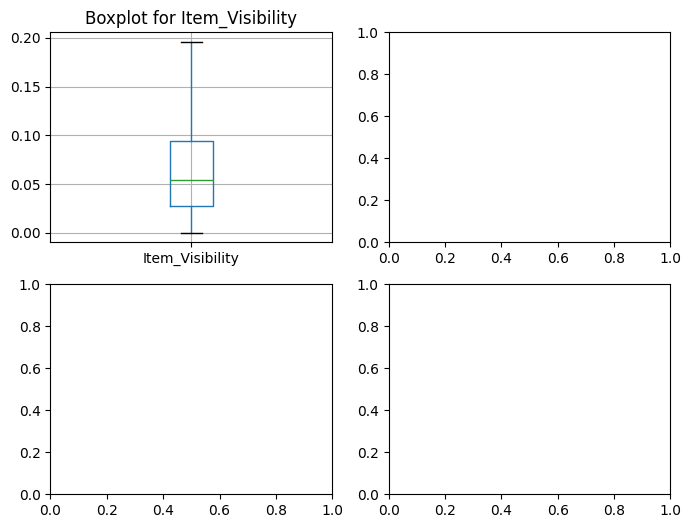

In [26]:
# Function to handle outlier treatment
def treat_outliers(df):
    column = 'Item_Visibility'
    
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip outliers
        df[column] = df[column].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
    
    return df

# Apply the outlier treatment
x_train_treated = treat_outliers(x_train)

#x_train_treated

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot boxplots for each column in the dataframe with enhanced outlier visibility
x_train_treated.boxplot(column='Item_Visibility', ax=axes[0, 0], flierprops=dict(marker='o', color='r', markersize=8))
axes[0, 0].set_title('Boxplot for Item_Visibility')



# Show the plot

In [27]:
x_train_treated

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
7276,7.210,2,0.144925,100.8332,4,2,2,11
1422,10.600,1,0.035164,84.4224,3,3,2,26
4561,19.700,1,0.041974,108.6912,4,2,2,6
6183,9.600,1,0.000000,166.5158,2,1,2,14
1644,6.035,1,0.195967,155.5998,4,3,1,15
...,...,...,...,...,...,...,...,...
4373,15.200,1,0.020280,49.1034,4,3,1,15
7891,12.150,2,0.025616,188.1872,2,3,4,28
4859,13.500,2,0.000000,78.3960,1,2,2,9
3264,18.700,1,0.104890,121.4072,4,2,2,11


In [28]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max normalization on the entire DataFrame
x_train_treated = pd.DataFrame(scaler.fit_transform(x_train_treated), columns=x_train_treated.columns)

x_train_treated.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0.158083,1.0,0.739535,0.295177,1.000000,0.5,0.333333,0.291667
1,0.359929,0.0,0.179436,0.225521,0.666667,1.0,0.333333,0.916667
2,0.901756,0.0,0.214191,0.328530,1.000000,0.5,0.333333,0.083333
3,0.300387,0.0,0.000000,0.573967,0.333333,0.0,0.333333,0.416667
4,0.088121,0.0,1.000000,0.527634,1.000000,1.0,0.000000,0.458333
5,0.294433,1.0,0.188408,0.691665,1.000000,1.0,0.000000,0.458333
6,0.866032,0.0,0.196787,0.755390,0.000000,0.0,0.333333,0.500000
7,0.633820,0.0,0.286976,0.337444,1.000000,1.0,0.000000,0.458333
8,0.627865,1.0,0.509469,0.475761,0.000000,0.5,0.333333,0.208333
9,0.082763,0.0,0.474613,0.409914,0.000000,0.5,0.333333,0.208333


In [29]:
x_train_treated.Outlet_Type.unique()

array([0.33333333, 0.        , 1.        , 0.66666667])

In [30]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

x_test.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0.594838,0.0,0.352240,0.541896,1.000000,0.5,0.333333,0.291667
1,0.780912,0.0,0.037333,0.135235,0.333333,1.0,1.000000,1.000000
2,0.414766,0.0,0.069469,0.413927,1.000000,0.5,0.333333,0.083333
3,0.336435,0.0,0.000000,0.471508,1.000000,0.5,0.333333,0.083333
4,0.984994,0.0,0.192893,0.693790,0.666667,1.0,0.333333,0.916667
5,0.166567,0.0,0.166645,0.827009,0.000000,0.0,0.333333,0.500000
6,0.780912,1.0,0.555993,0.246522,0.333333,1.0,1.000000,1.000000
7,0.187875,1.0,0.346694,0.362068,1.000000,0.5,0.333333,0.291667
8,0.825930,0.0,0.273088,0.673414,1.000000,1.0,0.000000,0.458333
9,0.864946,0.0,0.265167,0.419063,0.333333,1.0,0.666667,0.000000


MAPE (test dataset): 106.36 %
MAPE (train dataset): 97.85 %


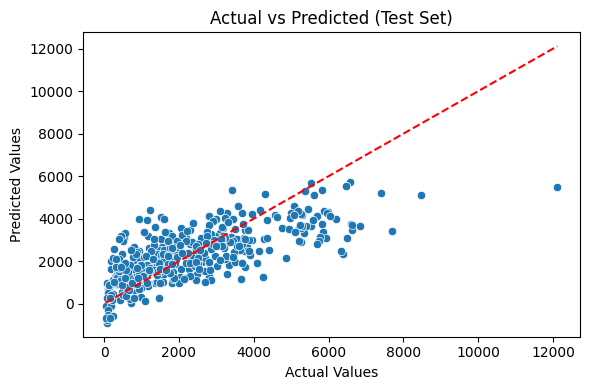

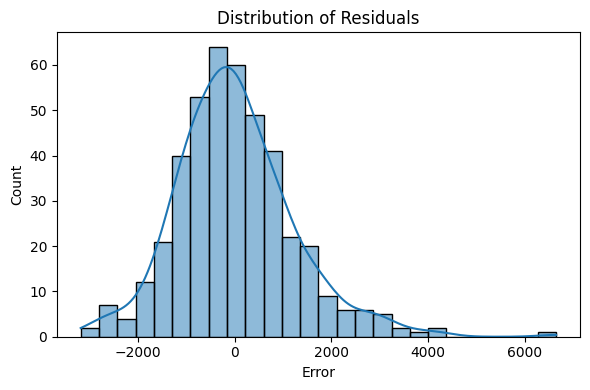

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

# Fit Linear Regression model
linreg = LinearRegression()
linreg.fit(x_train_treated, y_train)

# Predict on test and train data
y_pred_test = linreg.predict(x_test)
y_pred_train = linreg.predict(x_train_treated)

# Evaluation metrics
mape_test = mean_absolute_percentage_error(y_valid, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MAPE (test dataset):", round(mape_test * 100, 2), "%")
print("MAPE (train dataset):", round(mape_train * 100, 2), "%")

# Scatter plot of actual vs predicted (test set)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_valid, y=y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Set)")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.tight_layout()
plt.show()

# Optional: Histogram of residuals
residuals = y_valid - y_pred_test
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.tight_layout()
plt.show()


RF Regressor best params: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 50}
MAPE (Test): 59.11 %
MAPE (Train): 52.86 %
R² (Test): 0.6194


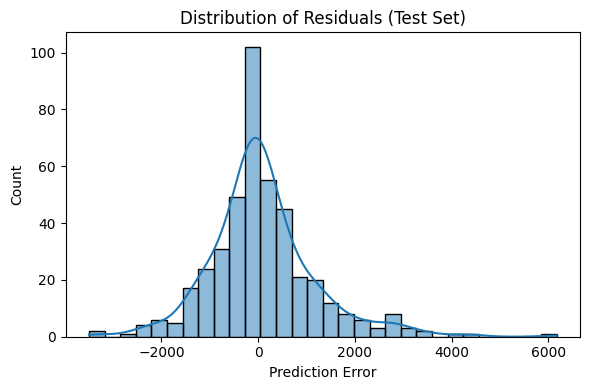

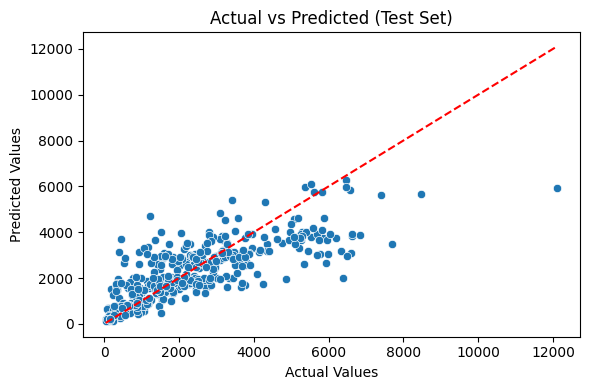

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Define parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [2, 3, 5, 10, 20, 30, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8, 10, 12, 14, 15]
}

# Initialize regressor
rfr = RandomForestRegressor(random_state=200)
gridsearch_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid_rf, n_jobs=6, cv=5)
gridsearch_rfr.fit(x_train_treated, y_train)

# Best hyperparameters
final_model_rfr = gridsearch_rfr.best_params_
print("RF Regressor best params:", final_model_rfr)

# Extract best params
best_max_depth = final_model_rfr['max_depth']
best_max_features = final_model_rfr['max_features']
best_n_estimators = final_model_rfr['n_estimators']

# Train final RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=best_n_estimators,
                                  max_depth=best_max_depth,
                                  max_features=best_max_features,
                                  random_state=200)
rf_model.fit(x_train_treated, y_train)

# Predictions
y_pred_test = rf_model.predict(x_test)
y_pred_train = rf_model.predict(x_train_treated)

# Evaluation Metrics
mape_test = mean_absolute_percentage_error(y_valid, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
r2_test = r2_score(y_valid, y_pred_test)

print("MAPE (Test):", round(mape_test * 100, 2), "%")
print("MAPE (Train):", round(mape_train * 100, 2), "%")
print("R² (Test):", round(r2_test, 4))

# Residual Plot
residuals = y_valid - y_pred_test
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals (Test Set)")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_valid, y=y_pred_test)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
XGBoost Regressor best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
MAPE (Test): 60.01 %
MAPE (Train): 56.77 %
R² (Test): 0.6305


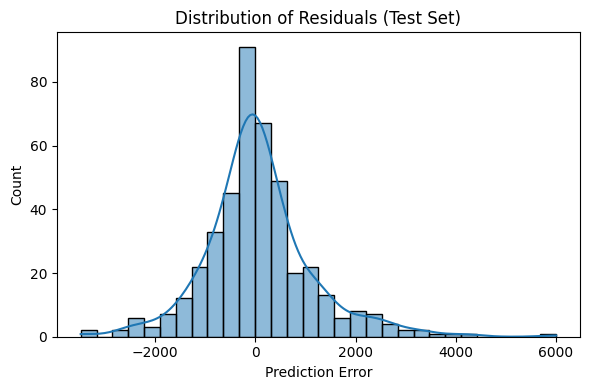

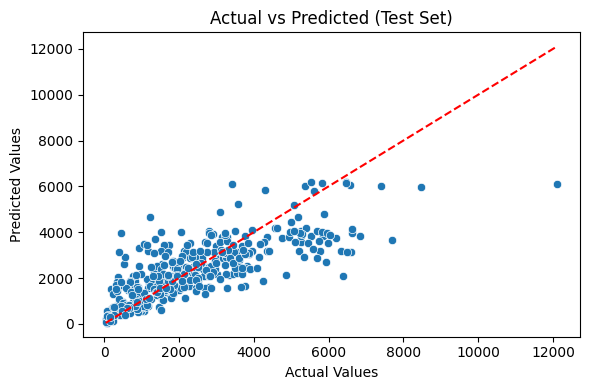

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [10, 20, 30, 50, 100, 150],
    'max_depth': [3, 5, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize regressor
xgb = XGBRegressor(random_state=200, objective='reg:squarederror')
gridsearch_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=6, verbose=1)
gridsearch_xgb.fit(x_train_treated, y_train)

# Best hyperparameters
best_params_xgb = gridsearch_xgb.best_params_
print("XGBoost Regressor best params:", best_params_xgb)

# Train final model with best params
xgb_model = XGBRegressor(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    subsample=best_params_xgb['subsample'],
    random_state=200,
    objective='reg:squarederror'
)

xgb_model.fit(x_train_treated, y_train)

# Predictions
y_pred_test = xgb_model.predict(x_test)
y_pred_train = xgb_model.predict(x_train_treated)

# Evaluation
mape_test = mean_absolute_percentage_error(y_valid, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
r2_test = r2_score(y_valid, y_pred_test)

print("MAPE (Test):", round(mape_test * 100, 2), "%")
print("MAPE (Train):", round(mape_train * 100, 2), "%")
print("R² (Test):", round(r2_test, 4))

# Residual Plot
residuals = y_valid - y_pred_test
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals (Test Set)")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_valid, y=y_pred_test)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()


Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7154637.5000 - val_loss: 3502956.7500
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2736838.0000 - val_loss: 2824480.2500
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2438962.5000 - val_loss: 2561100.5000
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2286724.2500 - val_loss: 2304115.2500
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1966957.6250 - val_loss: 2041778.3750
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1820207.3750 - val_loss: 1825089.0000
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1681556.8750 - val_loss: 1684360.1250
Epoch 8/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1645378.1250 - val_loss: 1608668.5000
Epoch 9/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1582452.5000 - val_loss: 1568319.3750
Epoch 10/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1589139.8750 - val_loss: 1546479.6250
Epoch 11/

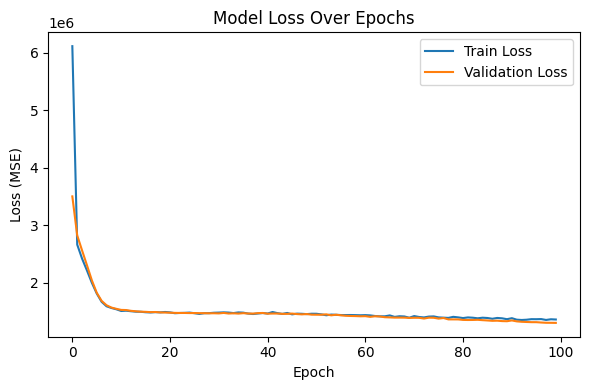

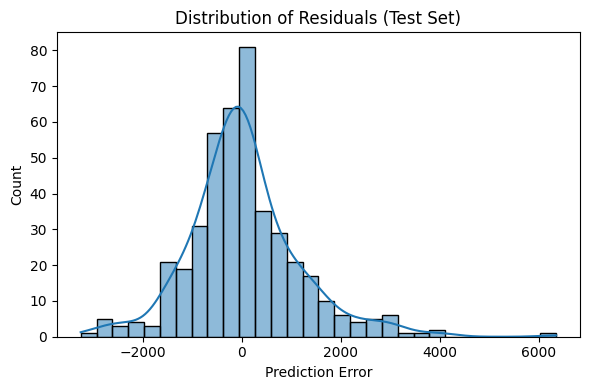

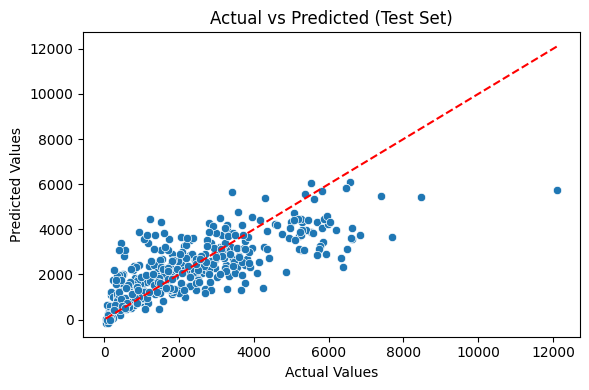

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

# Optional: Scale features
scaler = StandardScaler()
x_train_scaled = x_train_treated.copy()
x_test_scaled = x_test.copy()

# Define deep learning model
model = Sequential()
model.add(Dense(150, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train model
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_valid),
                    epochs=100, batch_size=32, verbose=1)

# Predict
y_pred_test = model.predict(x_test_scaled).flatten()
y_pred_train = model.predict(x_train_scaled).flatten()

# Evaluate
mape_test = mean_absolute_percentage_error(y_valid, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
r2_test = r2_score(y_valid, y_pred_test)

print("MAPE (Test):", round(mape_test * 100, 2), "%")
print("MAPE (Train):", round(mape_train * 100, 2), "%")
print("R² (Test):", round(r2_test, 4))

# Plot training history
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_valid - y_pred_test
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals (Test Set)")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_valid, y=y_pred_test)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()


In [41]:
test_df = pd.read_csv('test.csv')

test_df["Outlet_Age"] = 2013 - test_df["Outlet_Establishment_Year"]
test_df.drop("Outlet_Establishment_Year", axis=1, inplace=True)

test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1,6
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,16
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,4
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,NaN,Tier 2,Supermarket Type1,11
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,NaN,Tier 2,Supermarket Type1,6


In [42]:
test_df["Outlet_Size"] = test_df["Outlet_Size"].fillna("Unk")

# # Create mapping from Outlet_Type to mode of Outlet_Size
# mode_map = x_train.groupby("Outlet_Type")["Outlet_Size"].agg(lambda x: x.mode().iloc[0])

# # Impute missing Outlet_Size using the Outlet_Type-specific mode
# combined_df["Outlet_Size"] = x_train.apply(
#     lambda row: mode_map[row["Outlet_Type"]] if pd.isna(row["Outlet_Size"]) else row["Outlet_Size"],
#     axis=1
# )

mode_weight = test_df["Item_Weight"].mode()[0]
test_df["Item_Weight"] = test_df["Item_Weight"].fillna(mode_weight)


# Define manual mappings starting from 1
fat_content_map = {
    'Low Fat': 1,
    'Regular': 2,
    'low fat': 1,
    'LF': 1,
    'reg': 2
}

location_type_map = {
    'Tier 1': 1,
    'Tier 2': 2,
    'Tier 3': 3
}

outlet_size_map = {
    'Small': 1,
    'Medium': 2,
    'High': 3,
    'Unk': 4  # if used to fill missing values
}

outlet_type_map = {
    'Grocery Store': 1,
    'Supermarket Type1': 2,
    'Supermarket Type2': 3,
    'Supermarket Type3': 4
}

# Apply mappings to both datasets
for df in [test_df]:
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)
    df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map(location_type_map)
    df['Outlet_Size'] = df['Outlet_Size'].map(outlet_size_map)
    df['Outlet_Type'] = df['Outlet_Type'].map(outlet_type_map)

#df

test_df = df.copy()

test_df = pd.get_dummies(test_df, columns=["Item_Type"], prefix="ItemType", dtype=int)

In [43]:
## Filtering the list of columns in the x_test dataframe as per the x_train VIF removed columns
x_test_df=[]
for i in x_train:
    if i in test_df:
        x_test_df.append(i)
        
x_test_df=test_df[x_test_df]

x_test_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750,1,0.007565,107.8622,2,1,2,14
1,8.300,2,0.038428,87.3198,4,2,2,6
2,14.600,1,0.099575,241.7538,4,3,1,15
3,7.315,1,0.015388,155.0340,4,2,2,6
4,10.500,2,0.118599,234.2300,2,3,4,28
...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,141.3154,1,1,2,16
5677,7.600,2,0.142991,169.1448,2,3,3,4
5678,10.000,1,0.073529,118.7440,4,2,2,11
5679,15.300,2,0.000000,214.6218,4,2,2,6


In [44]:
x_test_df = pd.DataFrame(scaler.fit_transform(x_test_df), columns=x_test_df.columns)

x_test_df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1.949562,-0.740811,-1.134077,-0.536555,-0.337672,-1.369215,-0.252769,-0.139891
1,-0.929146,1.349873,-0.531850,-0.868937,1.374344,-0.138827,-0.252769,-1.095512
2,0.527550,-0.740811,0.661316,1.629848,1.374344,1.091560,-1.507994,-0.020438
3,-1.156899,-0.740811,-0.981416,0.226697,1.374344,-0.138827,-0.252769,-1.095512
4,-0.420458,1.349873,1.032540,1.508110,-0.337672,1.091560,2.257683,1.532446
5,-0.582313,1.349873,-0.036424,-0.386289,-1.193680,-1.369215,-0.252769,0.099015
6,1.625852,1.349873,0.330115,-1.471108,-0.337672,1.091560,1.002457,-1.334417
7,-0.420458,-0.740811,-0.973726,-0.970235,-0.337672,1.091560,2.257683,1.532446
8,-1.390433,1.349873,1.125541,-0.732638,1.374344,-0.138827,-0.252769,-0.498248
9,-1.464423,-0.740811,-1.170496,0.742175,1.374344,-0.138827,-0.252769,-1.095512


In [45]:
x_test_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age'],
      dtype='object')

In [46]:
test_pred = xgb_model.predict(x_test_df)

test_pred

array([ 34.670666, 148.59451 , 948.7822  , ..., 151.15947 , 985.56976 ,
        52.03289 ], dtype=float32)

In [48]:
test_df_final = test_df.copy()
test_df_final["Item_Outlet_Sales"] = test_pred

test_df_final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,...,ItemType_Hard Drinks,ItemType_Health and Hygiene,ItemType_Household,ItemType_Meat,ItemType_Others,ItemType_Seafood,ItemType_Snack Foods,ItemType_Soft Drinks,ItemType_Starchy Foods,Item_Outlet_Sales
0,FDW58,20.750,1,0.007565,107.8622,OUT049,2,1,2,14,...,0,0,0,0,0,0,1,0,0,34.670666
1,FDW14,8.300,2,0.038428,87.3198,OUT017,4,2,2,6,...,0,0,0,0,0,0,0,0,0,148.594513
2,NCN55,14.600,1,0.099575,241.7538,OUT010,4,3,1,15,...,0,0,0,0,1,0,0,0,0,948.782227
3,FDQ58,7.315,1,0.015388,155.0340,OUT017,4,2,2,6,...,0,0,0,0,0,0,1,0,0,423.154175
4,FDY38,10.500,2,0.118599,234.2300,OUT027,2,3,4,28,...,0,0,0,0,0,0,0,0,0,5741.837891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,2,0.013496,141.3154,OUT046,1,1,2,16,...,0,0,0,0,0,0,1,0,0,131.158234
5677,FDD47,7.600,2,0.142991,169.1448,OUT018,2,3,3,4,...,0,0,0,0,0,0,0,0,1,3121.790283
5678,NCO17,10.000,1,0.073529,118.7440,OUT045,4,2,2,11,...,0,1,0,0,0,0,0,0,0,151.159470
5679,FDJ26,15.300,2,0.000000,214.6218,OUT017,4,2,2,6,...,0,0,0,0,0,0,0,0,0,985.569763


In [49]:
test_df_final = test_df_final[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]

test_df_final.to_csv('test_df_final.csv')